<a href="https://colab.research.google.com/github/JvdAli/Movie-Review-Sentiment-Analysis-NLP/blob/main/Sentiment_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**        - Sentiment Analysis-NLP

##### **Project Type**    - EDA/Regression/Classification/Supervised
##### **Contribution**    - Individual




# **Project Summary -**
Movie reviews sentiment analysis is a project which is based on natural language processing, where we use NLP techniques to extract useful words of each review and based on these words we can use binary classification to predict the movie sentiment if it's positive or negative.

Sentiment analysis aims to determine a reviewer's attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

**About Dataset**
</br>
After reading the dataset which contains 50k movie reviews from IMDB, we see that there are two prominent columns. One being "review" which contains the criticism and the other being "sentiment" which contains the Postive and Negative remarks.





<b>  Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import joblib
# nltk.download() # Download "punkt" package

**Mounting Drive - Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/NLP-Sentiment Analysis/IMDB review Dataset.csv')

**Data Exploration - Understanding Your Variables**

In [4]:
#checking the shape ( number of rows and column numbers in the dataset)
df.shape

(50000, 2)

In [ ]:
# Checking first 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Checking last 5 rows
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


**Description of individual Variable**



*   review : each record represent movie reviews.
*   sentiment : positive/negative -labelled based on each review





In [ ]:
#looking for the data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**Conclusion**
*   No null values found in both the columns


## **Data distribution**


*   Checking data distribution of the sentiment column,a balanced dataset helps us to get high accuracy in prediction.




In [6]:
#Counting sentiments
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

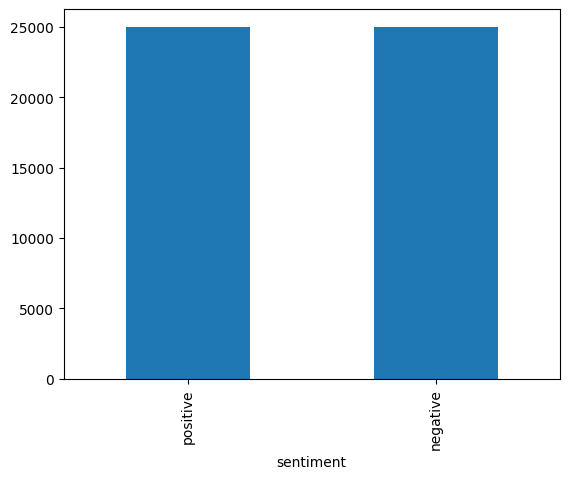

In [7]:
#Plotting a bar graph
df['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

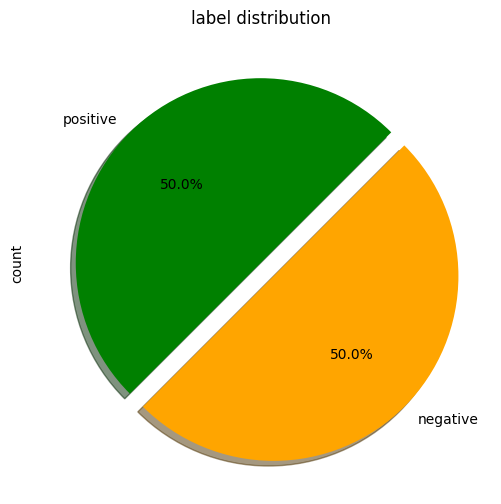

In [8]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
df['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,explode=(0, 0.1))
plt.title('label distribution')

**Conclusion**


*   dataset is well balanced i.e.  50% positive reviews and 50% negative reviews.




**Data Encoding**

In [9]:
#Encode output column(sentiment) into binary(0 & 1)
df.sentiment.replace('positive', 1, inplace=True)
df.sentiment.replace('negative', 0, inplace=True)
print(f"Dataset head after encoding :\n{df.head(10)}\n")

Dataset head after encoding :
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1
5  Probably my all-time favorite movie, a story o...          1
6  I sure would like to see a resurrection of a u...          1
7  This show was an amazing, fresh & innovative i...          0
8  Encouraged by the positive comments about this...          0
9  If you like original gut wrenching laughter yo...          1



## **Data Cleaning Steps**

*   Remove HTML tags
*   Remove special characters
*   Remove punctuation
*   Convert every reviews to lowercase
*   Remove stopwords
*   Stemming




**Remove HTML tags**

In [10]:
#Creating Functions to remove html tags
def remove_html_tags(text):
    re_html = re.compile('<.*?>')
    return re_html.sub(r'',text)

In [11]:
#Calling function to remove html tags
df.review = df.review.apply(remove_html_tags)

#Checking whether it is working perfectly or not.
print(f"Review sample after removing HTML tags : \n{df.review[1]}\n")   # 3rd row of dataset was having html tags , successfully removed

Review sample after removing HTML tags : 
A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well d

**Remove special characters**

In [12]:
# Remove special characters and numbers
df["review"] = df["review"].str.replace("[^a-zA-Z]", " ", regex=True)

# Remove extra spaces
df["review"] = df["review"].str.replace("\s+", " ", regex=True).str.strip()

**Remove punctuation**

In [13]:
import string
punctuation_pattern = f"[{string.punctuation}]"
df["review"] = df["review"].str.replace(punctuation_pattern, "", regex=True)

**Convert text of review column into lowercase**

In [14]:
#Creating function for lowercase
def to_lower(text):
    return text.lower()

#Calling function to convert into lowecase
df.review = df.review.apply(to_lower)

#Testing created function
print(f"Review sample after converting everything to lowercase : \n{df.review[1]}\n")

Review sample after converting everything to lowercase : 
a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done



**Remove stopwords**

In [16]:
# Tokenization the text of the review column
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download("stopwords")

df["review"] = df["review"].apply(word_tokenize)          #converting review column into tokens and storing in the same column

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Removing stop words
stop_words = set(stopwords.words("english"))    #creating stopwords library object

#creating function for stopwords removal
def remove_stop_words(token_list):
    return [word for word in token_list if word not in stop_words]

In [19]:
#calling function for stopwords removal
df["review"] = df["review"].apply(remove_stop_words)

In [20]:
#testing output for review[2]
print(f"Review sample after removing special characters : \n{df.review[1]}\n")

Review sample after removing special characters : 
['wonderful', 'little', 'production', 'filming', 'technique', 'unassuming', 'old', 'time', 'bbc', 'fashion', 'gives', 'comforting', 'sometimes', 'discomforting', 'sense', 'realism', 'entire', 'piece', 'actors', 'extremely', 'well', 'chosen', 'michael', 'sheen', 'got', 'polari', 'voices', 'pat', 'truly', 'see', 'seamless', 'editing', 'guided', 'references', 'williams', 'diary', 'entries', 'well', 'worth', 'watching', 'terrificly', 'written', 'performed', 'piece', 'masterful', 'production', 'one', 'great', 'master', 'comedy', 'life', 'realism', 'really', 'comes', 'home', 'little', 'things', 'fantasy', 'guard', 'rather', 'use', 'traditional', 'dream', 'techniques', 'remains', 'solid', 'disappears', 'plays', 'knowledge', 'senses', 'particularly', 'scenes', 'concerning', 'orton', 'halliwell', 'sets', 'particularly', 'flat', 'halliwell', 'murals', 'decorating', 'every', 'surface', 'terribly', 'well', 'done']



**Stem the words**

Lemmatization / Stemming
Choosing Between Lemmatization and Stemming

Lemmatization is generally more sophisticated and produces more grammatically correct results (actual words), but it's computationally more intensive.
Stemming is faster but may produce results that are not actual words (e.g., "runn" for "running").
These processes help in reducing the number of unique tokens in the model needs to learn about. I have chosen Stemming for faster processing.

In [21]:
#Chosen stemming
#creating function for stemming
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

#calling stemming function
df.review = df.review.apply(stem_txt)

#checking output for review[1]
print(f"Review sample after stemming the words : \n{df.review[1]}\n")

Review sample after stemming the words : 
wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done



## **Model Creation & Training**


In [27]:
#TF-IDF Vertorizer to convert the raw documents into feature matrix

from sklearn.feature_extraction.text import TfidfVectorizer   #importing TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)

y=df.sentiment.values
x=tfidf.fit_transform(df.review)

In [29]:
#Train test split
#Now to train a machine learning model I will split the data into 80% training and 20% test sets:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

**Logistic Regression vs Logistic Regression CV(Cross Validation )**</br>
Both versions are great, but CV adds a polishing touch. Regular regression is good for simple tasks or learning the basics. But for complex problems or needing top-notch accuracy, CV is your friend.
Regular regression might learn basic word patterns, but CV would "test" its predictions on different sets of reviews, fine-tuning its understanding of sentiment to be more accurate overall.

In [30]:
#Model training and storing test results in y_pred
from sklearn.linear_model import LogisticRegressionCV

clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.4min finished



## **Model Evaluation : Checking accuracy of the model**

In [31]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8944


## **Collecting Pickle files**

In [32]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))   #creating pickle file for tfidf vectorized data
pickle.dump(clf,open('clf.pkl','wb'))       #creating pickle file for the trained model
